In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


%matplotlib inline

sns.set(style='darkgrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [5]:
data = pd.read_csv('E:/heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


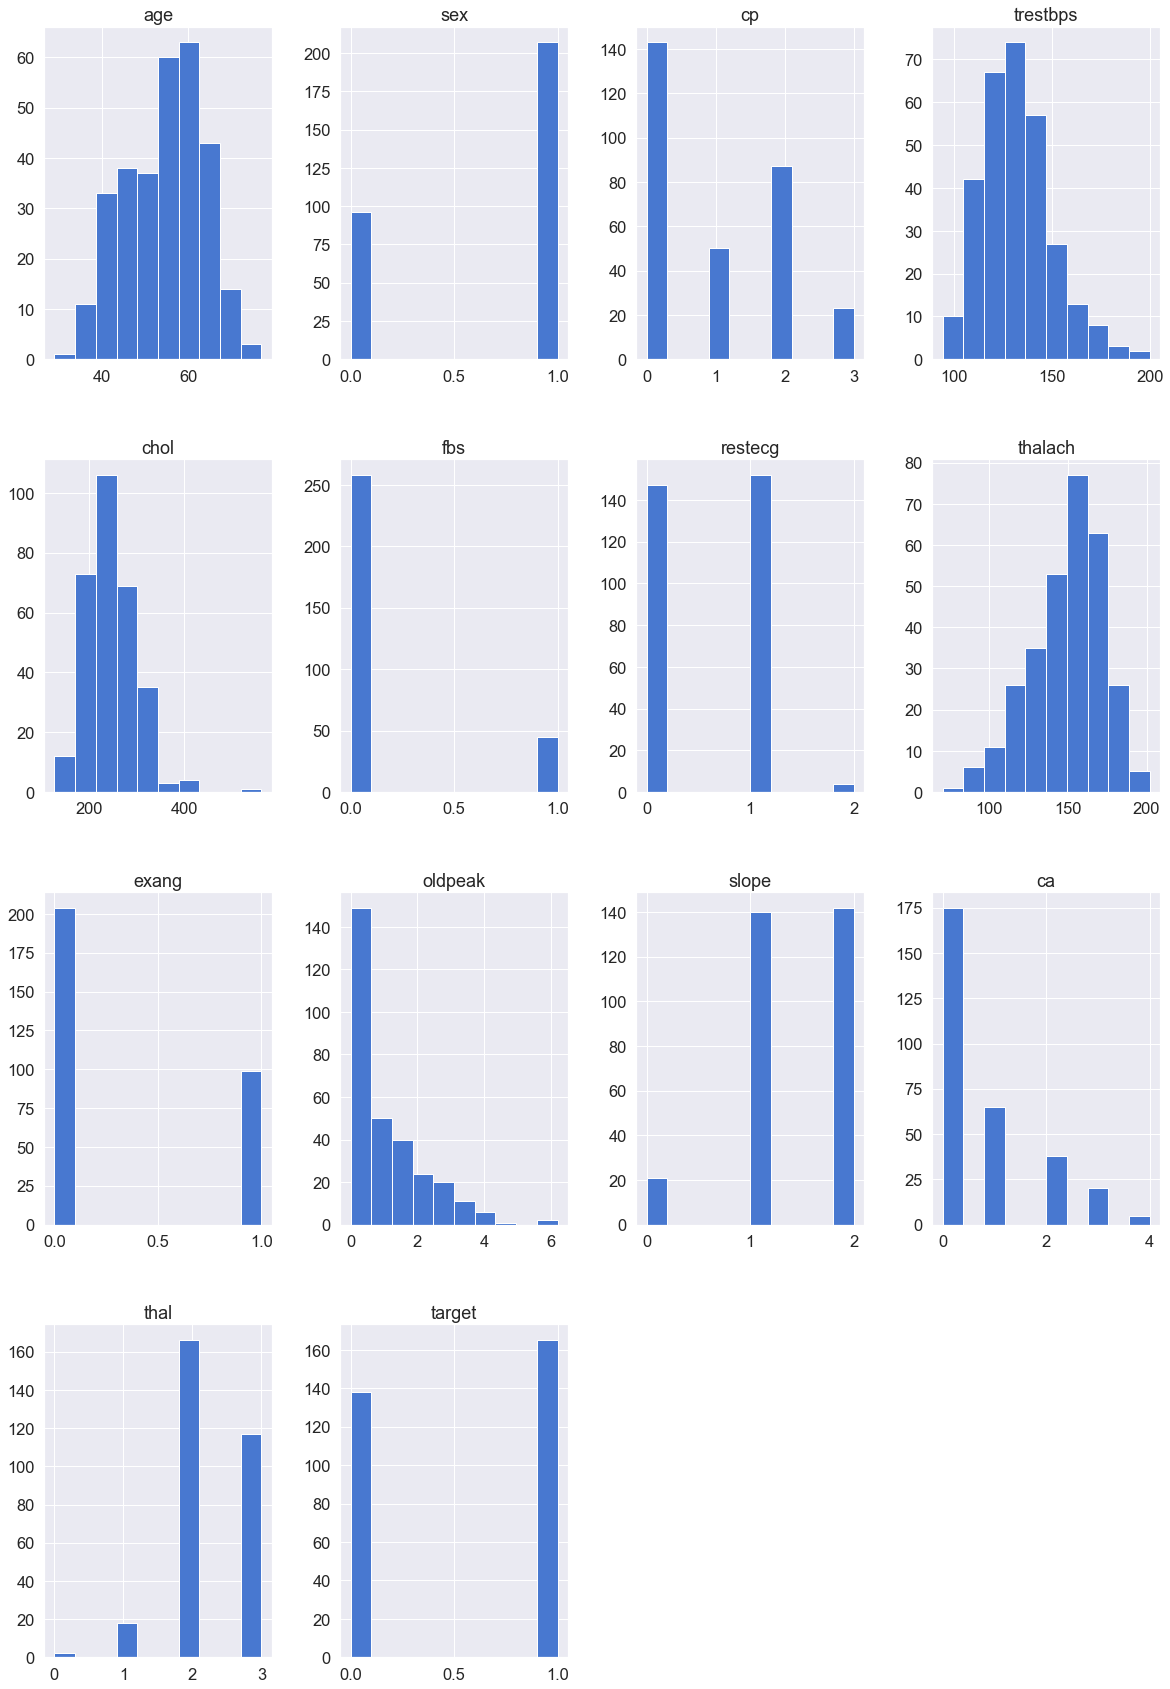

In [8]:
data.hist(figsize=(20,30))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

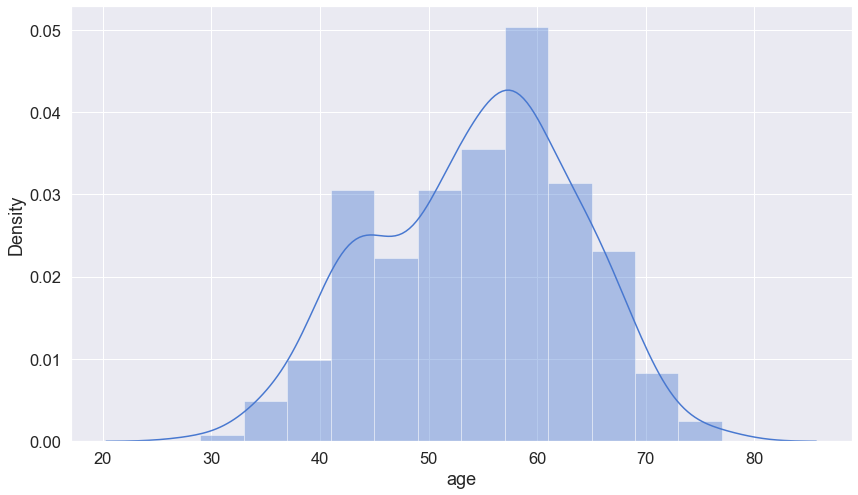

In [9]:
sns.distplot(data['age'])

In [10]:
data['age'].max()

77

In [11]:
data['age'].min()

29

Text(0.5, 1.0, 'Age Vs Cholestrol')

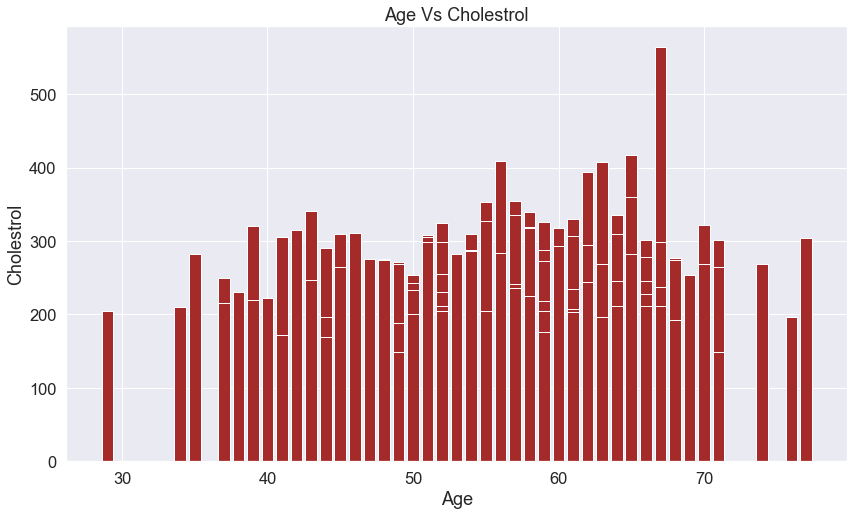

In [12]:
plt.bar(data['age'],data['chol'],color='brown')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.title('Age Vs Cholestrol')

([<matplotlib.patches.Wedge at 0x1c15e0d1dc0>,
 [Text(-0.1534669293828939, 1.0892418930548835, '1'),
  Text(0.1534670313650796, -1.0892418786862677, '0')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.5%'),
  Text(0.08370928983549797, -0.5941319338288732, '45.5%')])

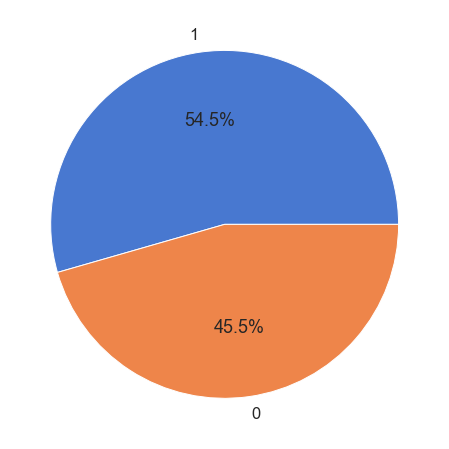

In [13]:
values=data['target'].value_counts()
labels=data['target'].unique().tolist()

plt.pie(values,labels=labels, autopct='%1.1f%%',radius =1)


([<matplotlib.axis.XTick at 0x1c15de83370>,
 [Text(0, 0, ''), Text(0, 0, '')])

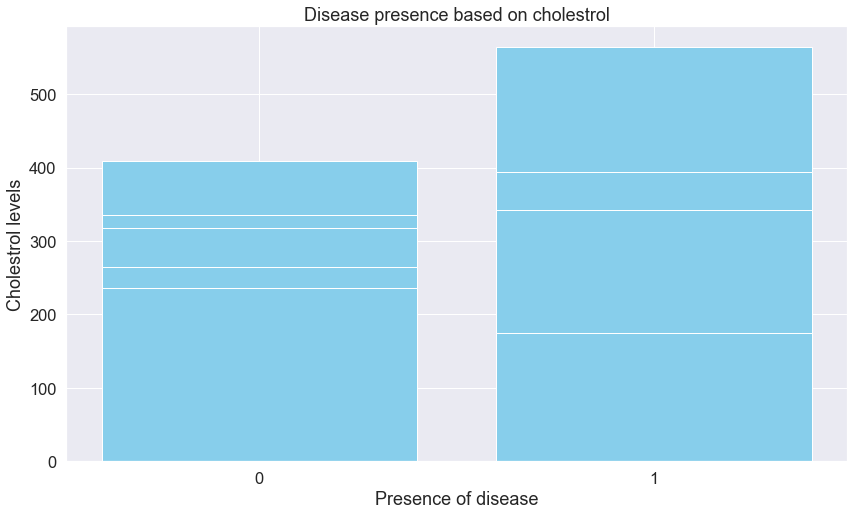

In [14]:
plt.bar(data['target'],data['chol'],color='skyblue')
plt.xlabel('Presence of disease')
plt.ylabel('Cholestrol levels')
plt.title('Disease presence based on cholestrol')
plt.xticks([0,1])

Text(0.5, 1.0, 'Age Vs Resting blood pressure')

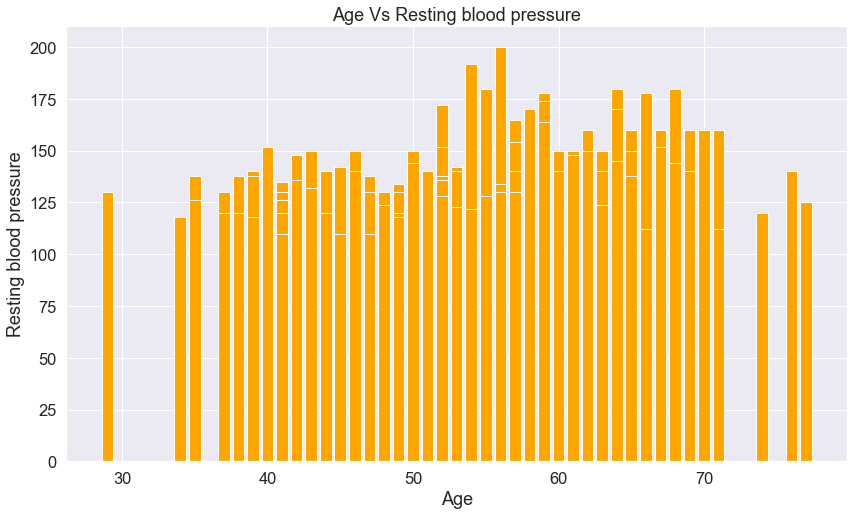

In [15]:
plt.bar(data['age'],data['trestbps'],color='orange')
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.title('Age Vs Resting blood pressure')

Text(0.5, 1.0, 'Age Vs blood sugar')

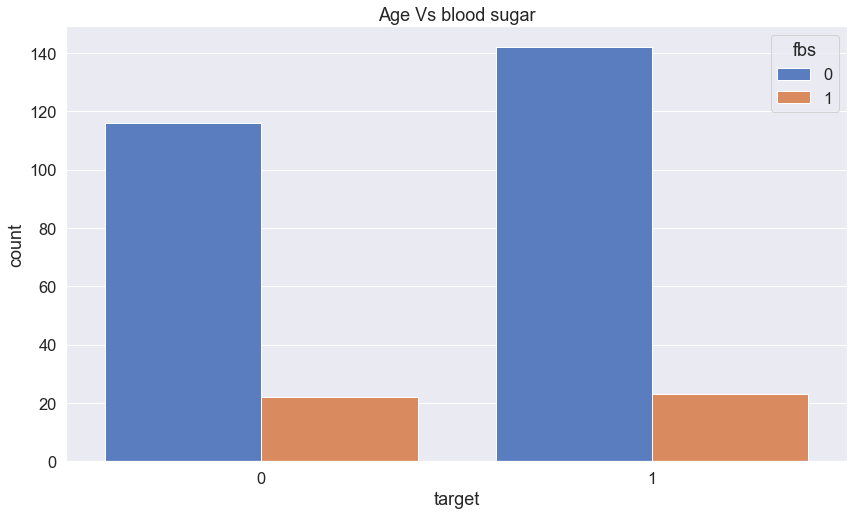

In [17]:
f = sns.countplot(x='target', data=data, hue='fbs')


f.set_title("Age Vs blood sugar")
#f.set_xticklabels(['No Heart disease', 'Heart Disease'])
#plt.xlabel("");

In [18]:
data.shape

(303, 14)

In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

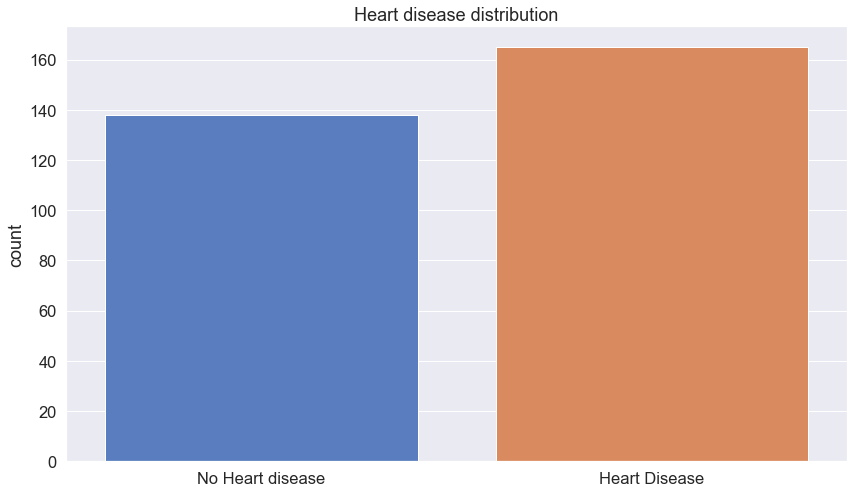

In [20]:
f = sns.countplot(x='target', data=data)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

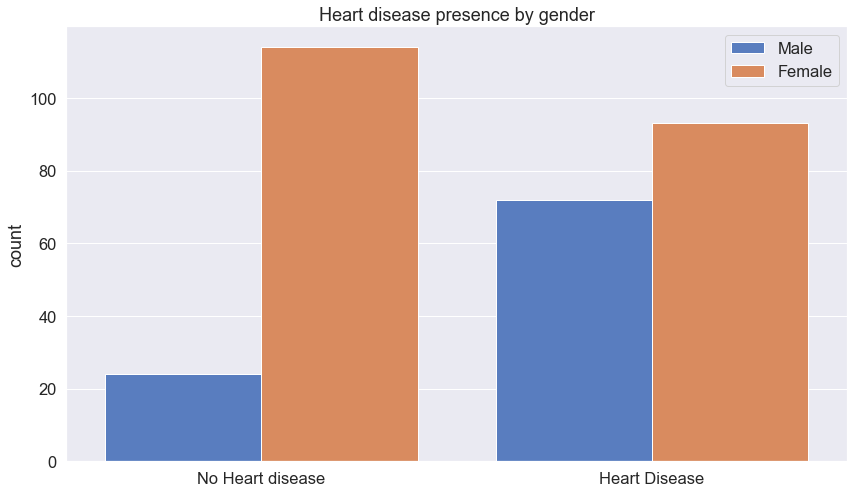

In [21]:
f = sns.countplot(x='target', data=data, hue='sex')

plt.legend(['Male', 'Female'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

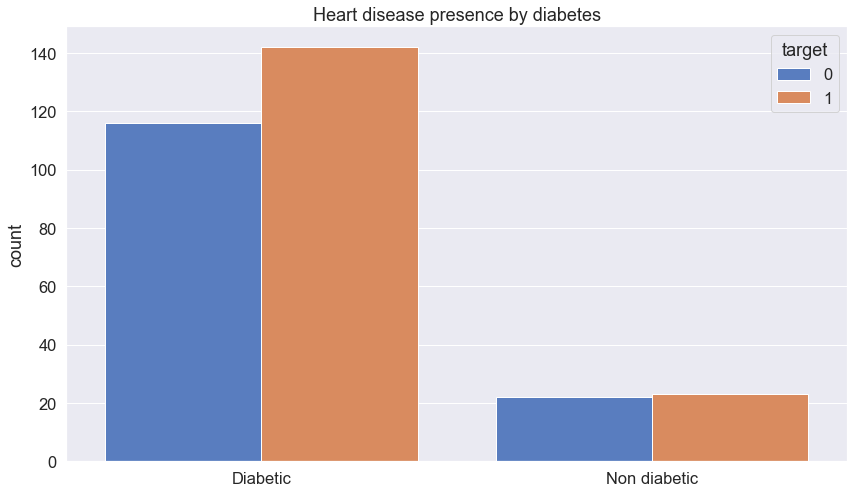

In [22]:
f = sns.countplot(x='fbs', data=data, hue='target')
#plt.legend(['no disease', 'disease'])
f.set_title("Heart disease presence by diabetes")
f.set_xticklabels(['Diabetic', 'Non diabetic'])
plt.xlabel("");

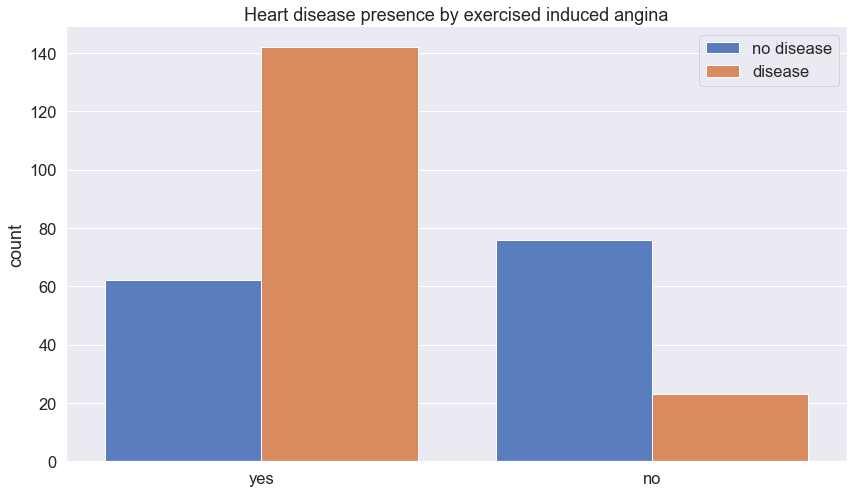

In [23]:
f = sns.countplot(x='exang', data=data, hue='target')
plt.legend(['no disease', 'disease'])
f.set_title("Heart disease presence by exercised induced angina")
f.set_xticklabels(['yes', 'no'])
plt.xlabel("");

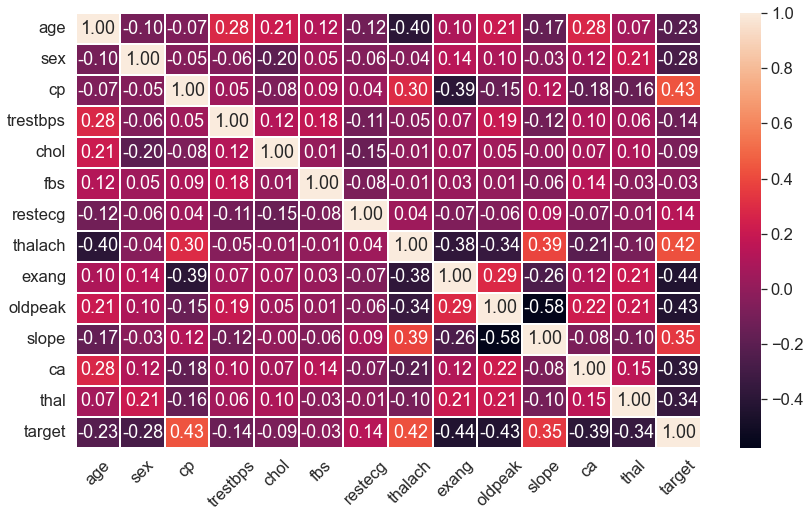

In [24]:
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

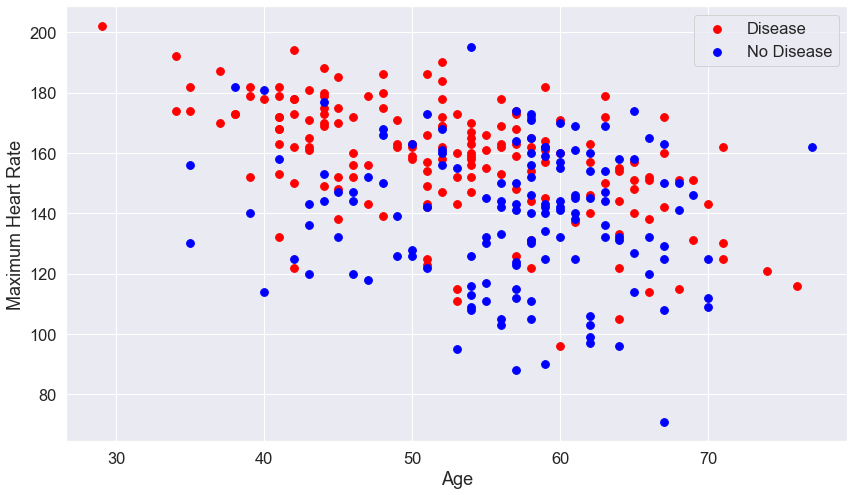

In [25]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red", s=60)
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)],c="blue", s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

In [26]:
data['Age_Category'] = pd.cut(data['age'],bins=list(np.arange(25, 85, 5)))

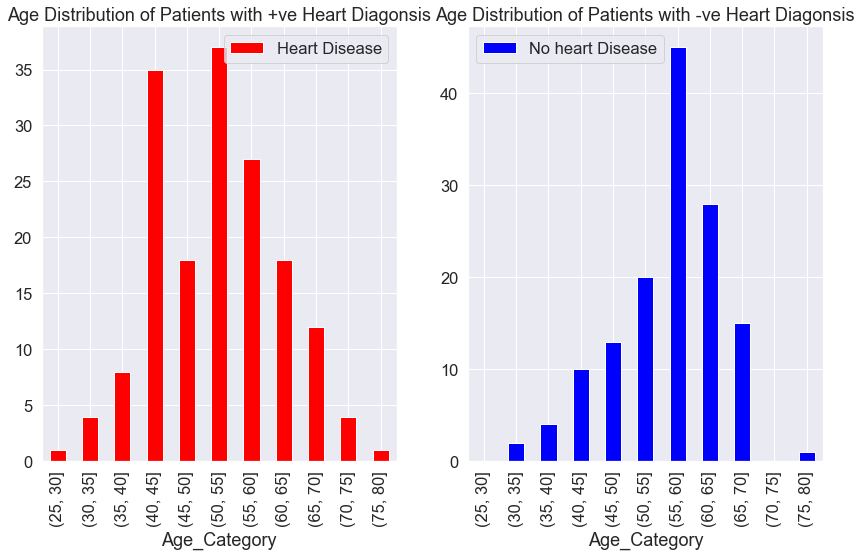

In [27]:
plt.subplot(121)
data[data['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar',color="red" )
plt.title('Age Distribution of Patients with +ve Heart Diagonsis')
plt.legend(['Heart Disease']);

plt.subplot(122)
data[data['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar', color="blue")
plt.title('Age Distribution of Patients with -ve Heart Diagonsis')
plt.legend(['No heart Disease']);

In [28]:
del data['Age_Category']

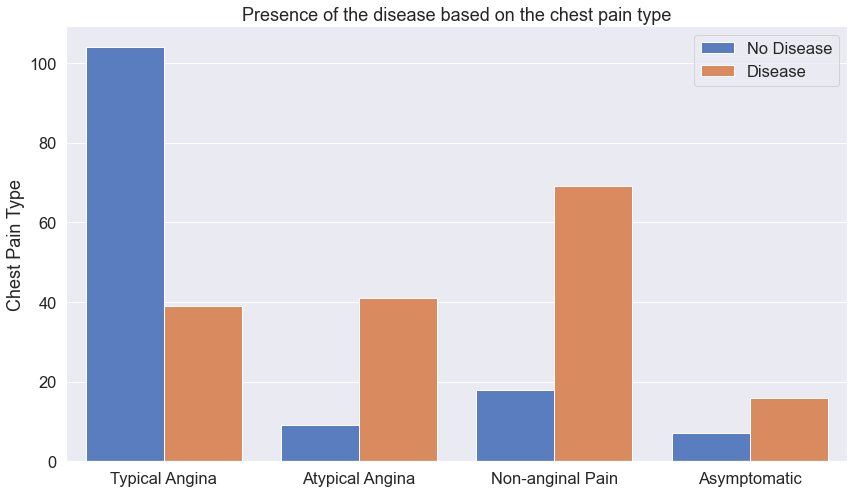

In [29]:
f = sns.countplot(x='cp', data=data, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Presence of the disease based on the chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

In [36]:
X = data.loc[:,data.columns!='target']
y = data.iloc[:,-1]


In [37]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized cols
age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
data["thal"] = data["thal"].apply(str)
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['3', '6', '7'])
thal_one_hot = tf.feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

data["sex"] = data["sex"].apply(str)
sex = tf.feature_column.categorical_column_with_vocabulary_list(
      'sex', ['0', '1'])
sex_one_hot = tf.feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

data["cp"] = data["cp"].apply(str)
cp = tf.feature_column.categorical_column_with_vocabulary_list(
      'cp', ['0', '1', '2', '3'])
cp_one_hot = tf.feature_column.indicator_column(cp)
feature_columns.append(cp_one_hot)

data["slope"] = data["slope"].apply(str)
slope = tf.feature_column.categorical_column_with_vocabulary_list(
      'slope', ['0', '1', '2'])
slope_one_hot = tf.feature_column.indicator_column(slope)
feature_columns.append(slope_one_hot)


# embedding cols
thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
age_thal_crossed = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
age_thal_crossed = tf.feature_column.indicator_column(age_thal_crossed)
feature_columns.append(age_thal_crossed)

cp_slope_crossed = tf.feature_column.crossed_column([cp, slope], hash_bucket_size=1000)
cp_slope_crossed = tf.feature_column.indicator_column(cp_slope_crossed)
feature_columns.append(cp_slope_crossed)

In [39]:
def create_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [40]:
X_train,x_test,y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [41]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

NameError: name 'train' is not defined

In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=200, use_multiprocessing=True)

NameError: name 'train_ds' is not defined

In [44]:
model.evaluate(test_ds)

NameError: name 'test_ds' is not defined

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

NameError: name 'history' is not defined

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [159]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [160]:
predictions = model.predict(test_ds)

In [161]:
bin_predictions = tf.round(predictions).numpy().flatten()

In [165]:

print(classification_report(y_test, bin_predictions))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53        29
           1       0.50      0.34      0.41        32

    accuracy                           0.48        61
   macro avg       0.48      0.48      0.47        61
weighted avg       0.48      0.48      0.47        61



In [163]:
cnf_matrix = confusion_matrix(y_test, bin_predictions)
cnf_matrix

array([[18, 11],
       [21, 11]], dtype=int64)

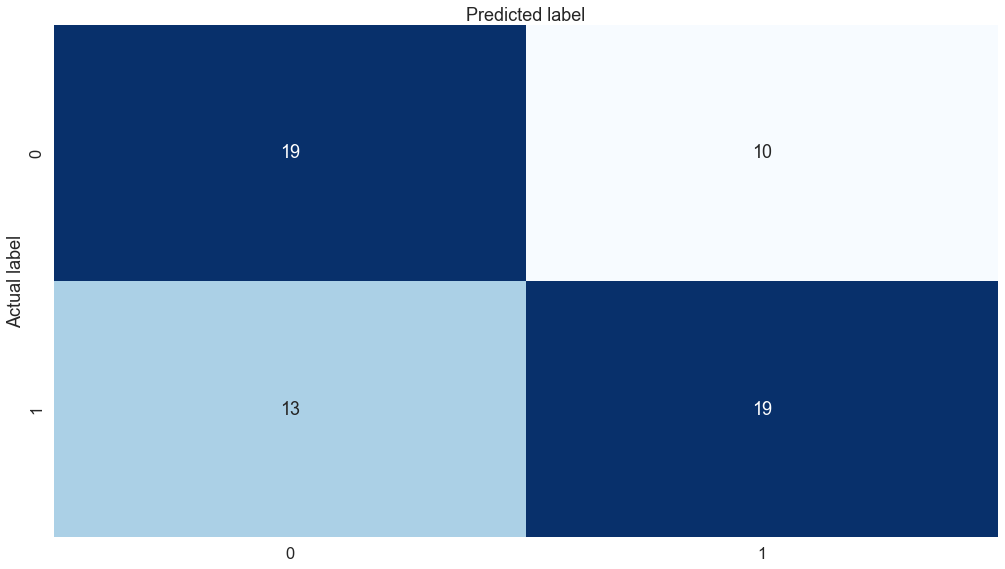

In [132]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Blues",fmt="d",cbar=False)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [134]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, bin_predictions))

------------------------------------------------Accuracy Score-------------------------------------------------------
0.6229508196721312
